In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
file = '../publication_database.csv'

ecdatabase = database.Database(file)
ecdatabase.load_models()
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('orthopyroxene')
model_names

/Volumes/MT_RESEARCH/2D_Petrology/mineral_conductivity/mineralconductivities/ensembles/../pyrrhenious/database.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subframe['grouping_id'] = subframe['entry_id'].str.slice(stop=-5)


['xu_1999_ortho',
 'zhang_2016_opx',
 'D_2005_opx',
 'DK_2009_opx',
 'Yang_11a_opx',
 'Zh_2012_ortho']

# Exploring Pyrrhenious's Wadsleyite Ensembles

Here we look at Wadsleyite models parameterization correspondence of:

 * Yoshino et al., 2008. Dry mantle transition zone inferred from the conductivity of wadsleyite and ringwoodite

 * Takashi Yoshino and Tomoo Katsura 2012. Re-evaluation of electrical conductivity of anhydrous and hydrous wadsleyite
  
 * Sun et al., 2018. Supercritical fluid in the mantle transition zone deduced from H–D interdiffusion of wadsleyite
 
In order to match the results of Yoshino and Katusra 2012, The small polaron conduction enthalpy had to be increased from 1.45 to 1.5, the water exponent in proton conduction was set to one, and the alpha value in the exponent had to be increased from 0.02 to 0.2. Sun et al. 2018 also had significant revisions to the preexponential constants and enthalpy in order to match both the diffusion and conductivity data, albeit within the stdev reported.

## Dry Trends

Only the models of Yoshino et al., 2008 and Yoshino and Katsura 2012 are used for dry. Sun et al., 2018 used Yoshino 2008's dry polaron conduction as a basis for dry conductivity, so the Sun result is not applicable

/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_75452/326790259.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  linewidth=2,label=model+f' {P} GPa',color=cm.get_cmap('autumn')(i/(4)))
/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_75452/326790259.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  linewidth=2,label=model+f' Xfe:{iron:2.2f} GPa:{P}',color=cm.get_cmap('hsv')((2*i+j)/(4)))


Text(0, 0.5, 'log10(sigma)')

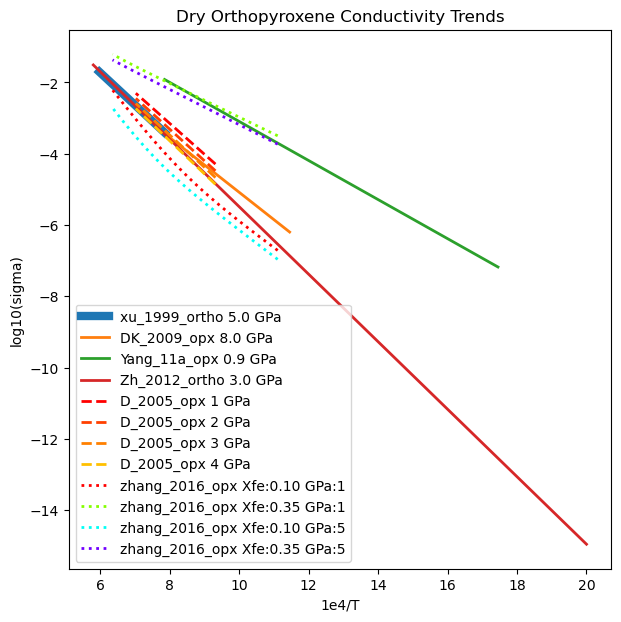

In [3]:
import matplotlib.cm as cm
t = np.linspace(773,2273,num=100)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('orthopyroxene')
fix, ax = plt.subplots(figsize=(7,7))
for i, model in enumerate(filter(lambda x : 'zhang_2016_opx' not in x and '05' not in x, model_names)):
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range = np.linspace(ec_model_row['temp_mink'],
                                    ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
    pressure = float(ec_model_row['pressure_average_gpa'].values[0])
    if 'xu' in model:
        linewidth=6
    else:
        linewidth=2
   
    ax.plot(1e4/temperature_range,
            np.log10(ec_model.get_conductivity(T=temperature_range,Cw=0,P=0)),
            linewidth=linewidth,label=model+f' {pressure:1.1f} GPa')

for i, model in enumerate(filter(lambda x : '05' in x, model_names)):
    
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range = np.linspace(ec_model_row['temp_mink'],
                                    ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
    for i,P in enumerate([1,2,3,4]):
        ax.plot(1e4/temperature_range,
            np.log10(ec_model.get_conductivity(T=temperature_range,P=P,Cw=0)),linestyle='--',
            linewidth=2,label=model+f' {P} GPa',color=cm.get_cmap('autumn')(i/(4)))
        
for i, model in enumerate(filter(lambda x : '16' in x, model_names)):
    
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range = np.linspace(ec_model_row['temp_mink'],
                                    ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
    for i,P in enumerate([1,5]):
        for j, iron in enumerate([0.1,0.35]):
            ax.plot(1e4/temperature_range,
            np.log10(ec_model.get_conductivity(T=temperature_range,P=P,X_fe=iron)),linestyle=':',
            linewidth=2,label=model+f' Xfe:{iron:2.2f} GPa:{P}',color=cm.get_cmap('hsv')((2*i+j)/(4)))
    

plt.legend(loc='lower left')
plt.title('Dry Orthopyroxene Conductivity Trends')
plt.xlabel('1e4/T')
plt.ylabel('log10(sigma)')


In [16]:
temperature_range_extended = np.linspace(400,2200,num=1801,dtype=float).ravel()
model_within=[]
model_extended=[]
for i, model in enumerate(filter(lambda x : 'zhang_2016_opx' not in x and '05' not in x, model_names)):
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range = np.arange(ec_model_row['temp_mink'].values[0],
                                    ec_model_row['temp_maxk'].values[0]+1,1,dtype=int)
    pressure = float(ec_model_row['pressure_average_gpa'].values[0])
    ec1     = ec_model.get_conductivity(T=temperature_range,Cw=0,P=0)
    ec1_ext = ec_model.get_conductivity(T=temperature_range_extended,Cw=0,P=0)
    
    model_within.append(pd.Series(ec1,index = temperature_range,name=model+'1'))
    model_extended.append(pd.Series(ec1_ext,index = temperature_range_extended,name=model+'2'))

for i, model in enumerate(filter(lambda x : '05' in x, model_names)):
    
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range = np.arange(ec_model_row['temp_mink'].values[0],
                                    ec_model_row['temp_maxk'].values[0]+1,1,dtype=int)
    for i,P in enumerate([1,2,3,4]):
        c1 = ec_model.get_conductivity(T=temperature_range,P=P,Cw=0)
        c2 = ec_model.get_conductivity(T=temperature_range_extended,P=P,Cw=0)
        model_within.append(pd.Series(c1,index = temperature_range,name=model+f'{P} 1'))
        model_extended.append(pd.Series(c2,index = temperature_range_extended,name=model+f'{P} 2'))
       
        
for i, model in enumerate(filter(lambda x : '16' in x, model_names)):
    
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range = np.arange(ec_model_row['temp_mink'].values[0],
                                    ec_model_row['temp_maxk'].values[0]+1,1,dtype=int)
    for i,P in enumerate([1,5]):
        for j, iron in enumerate([0.1,0.35]):
            c1 = ec_model.get_conductivity(T=temperature_range,P=P,Cw=0,X_fe=iron)
            c2 = ec_model.get_conductivity(T=temperature_range_extended,P=P,Cw=0,X_fe=iron)
            model_within.append(pd.Series(c1,index = temperature_range,name=model+f'{P} {iron} 1'))
            model_extended.append(pd.Series(c2,index = temperature_range_extended,name=model+f'{P} {iron} 2'))
                    
                    
    

In [17]:
within_experiments = np.log10(pd.concat(model_within,axis=1).sort_index())
extrapolated = np.log10(pd.concat(model_extended,axis=1).sort_index())
extrapolated

xu_1999_ortho2  DK_2009_opx2  Yang_11a_opx2  Zh_2012_ortho2  \
400.0       -18.959002    -16.601555     -11.318197      -19.696957   
401.0       -18.902446    -16.553671     -11.284012      -19.637888   
402.0       -18.846171    -16.506025     -11.249997      -19.579112   
403.0       -18.790176    -16.458615     -11.216151      -19.520628   
404.0       -18.734457    -16.411440     -11.182472      -19.462433   
...                ...           ...            ...             ...   
2196.0       -0.410966     -0.897551      -0.106939       -0.324564   
2197.0       -0.409085     -0.895959      -0.105803       -0.322600   
2198.0       -0.407207     -0.894368      -0.104667       -0.320638   
2199.0       -0.405330     -0.892779      -0.103533       -0.318678   
2200.0       -0.403455     -0.891192      -0.102399       -0.316720   

        D_2005_opx1 2  D_2005_opx2 2  D_2005_opx3 2  D_2005_opx4 2  \
400.0      -17.886322     -18.395575     -18.904828     -19.414081   
401.0      -17.832266     -18.340249     -18.848232     -19.356215   
402.0      -17.778479     -18.285199     -18.791918     -19.298638   
403.0      -17.724959     -18.230422     -18.735884     -19.241346   
404.0      -17.671704     -18.175916     -18.680127     -19.184338   
...               ...            ...            ...            ...   
2196.0      -0.158328      -0.251088      -0.343848      -0.436609   
2197.0      -0.156531      -0.249249      -0.341967      -0.434685   
2198.0      -0.154735      -0.247411      -0.340087      -0.432763   
2199.0      -0.152942      -0.245575      -0.338209      -0.430842   
2200.0      -0.151149      -0.243741      -0.336332      -0.428924   

        zhang_2016_opx1 0.1 2  zhang_2016_opx1 0.35 2  zhang_2016_opx5 0.1 2  \
400.0              -16.643558              -10.063761             -17.190940   
401.0              -16.599030              -10.034285             -17.145047   
402.0              -16.554724              -10.004955             -17.099382   
403.0              -16.510637               -9.975771             -17.053944   
404.0              -16.466769               -9.946731             -17.008731   
...                       ...                     ...                    ...   
2196.0               0.076499                0.199918              -0.315108   
2197.0               0.079157                0.202158              -0.312281   
2198.0               0.081813                0.204398              -0.309457   
2199.0               0.084466                0.206637              -0.306635   
2200.0               0.087116                0.208875              -0.303816   

        zhang_2016_opx5 0.35 2  
400.0               -10.595474  
401.0               -10.564671  
402.0               -10.534022  
403.0               -10.503525  
404.0               -10.473179  
...                        ...  
2196.0               -0.098146  
2197.0               -0.096032  
2198.0               -0.093918  
2199.0               -0.091804  
2200.0               -0.089690  

[1801 rows x 12 columns]

In [18]:
within_experiments.sort_index(inplace=True)
within_experiments

xu_1999_ortho1  DK_2009_opx1  Yang_11a_opx1  Zh_2012_ortho1  \
500              NaN           NaN            NaN      -14.959566   
501              NaN           NaN            NaN      -14.921742   
502              NaN           NaN            NaN      -14.884070   
503              NaN           NaN            NaN      -14.846547   
504              NaN           NaN            NaN      -14.809173   
...              ...           ...            ...             ...   
1719             NaN           NaN            NaN       -1.521799   
1720             NaN           NaN            NaN       -1.518595   
1721             NaN           NaN            NaN       -1.515394   
1722             NaN           NaN            NaN       -1.512197   
1723             NaN           NaN            NaN       -1.509003   

      D_2005_opx1 1  D_2005_opx2 1  D_2005_opx3 1  D_2005_opx4 1  \
500             NaN            NaN            NaN            NaN   
501             NaN            NaN            NaN            NaN   
502             NaN            NaN            NaN            NaN   
503             NaN            NaN            NaN            NaN   
504             NaN            NaN            NaN            NaN   
...             ...            ...            ...            ...   
1719            NaN            NaN            NaN            NaN   
1720            NaN            NaN            NaN            NaN   
1721            NaN            NaN            NaN            NaN   
1722            NaN            NaN            NaN            NaN   
1723            NaN            NaN            NaN            NaN   

      zhang_2016_opx1 0.1 1  zhang_2016_opx1 0.35 1  zhang_2016_opx5 0.1 1  \
500                     NaN                     NaN                    NaN   
501                     NaN                     NaN                    NaN   
502                     NaN                     NaN                    NaN   
503                     NaN                     NaN                    NaN   
504                     NaN                     NaN                    NaN   
...                     ...                     ...                    ...   
1719                    NaN                     NaN                    NaN   
1720                    NaN                     NaN                    NaN   
1721                    NaN                     NaN                    NaN   
1722                    NaN                     NaN                    NaN   
1723                    NaN                     NaN                    NaN   

      zhang_2016_opx5 0.35 1  
500                      NaN  
501                      NaN  
502                      NaN  
503                      NaN  
504                      NaN  
...                      ...  
1719                     NaN  
1720                     NaN  
1721                     NaN  
1722                     NaN  
1723                     NaN  

[1224 rows x 12 columns]

## Hydrous Trends

/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_75452/1532889642.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  np.log10(c),linestyle=linestyle,color=cm.get_cmap('cool_r')(i/(len(water)+1)))
/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_75452/1532889642.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.plot([],[],label=f'{ppm_h2o} Wt % Water',color=cm.get_cmap('cool_r')(i/(len(water)+1)))


Text(0, 0.5, 'log10(sigma)')

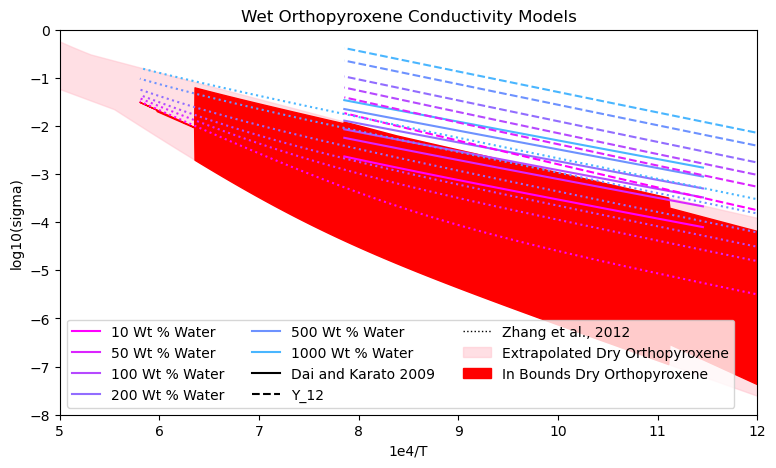

In [29]:
fix, ax = plt.subplots(figsize=(9,5))
water = [10,50,100,200,500,1000]
for model in model_names:
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model = ecdatabase.get_model(model)
    if not ec_model.uses_water:
        continue
        
    temperature_range = np.linspace(ec_model_row['temp_mink'],
                                    ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
    if 'DK' in ec_model.metadata.entry_id:
        linestyle='-'
    elif 'Zh' in ec_model.metadata.entry_id:
        linestyle=':'
    else:
        linestyle='--'
    for i, ppm_h2o in enumerate(water):
        c = ec_model.get_conductivity(T=temperature_range,Cw=ppm_h2o,co2=0)
        ax.plot(1e4/temperature_range,
            np.log10(c),linestyle=linestyle,color=cm.get_cmap('cool_r')(i/(len(water)+1)))

for i, ppm_h2o in enumerate(water):
    c = ec_model.get_conductivity(T=temperature_range,Cw=ppm_h2o*1e4,co2=0)
    ax.plot([],[],label=f'{ppm_h2o} Wt % Water',color=cm.get_cmap('cool_r')(i/(len(water)+1)))
plt.plot([],[],linestyle='-',label='Dai and Karato 2009',color='black')
plt.plot([],[],linestyle='--',label='Y_12',color='black')
plt.plot([],[],linestyle=':',label='Zhang et al., 2012 ',linewidth=1,color='black')


ax.fill_between(1e4/extrapolated.index, 
                extrapolated.min(axis=1)-extrapolated.min(axis=1)*1e-3,
                extrapolated.max(axis=1),label='Extrapolated Dry Orthopyroxene',color='pink',alpha=0.5) 
ax.fill_between(1e4/within_experiments.index, 
                within_experiments.min(axis=1)-within_experiments.min(axis=1)*1e-3,
                within_experiments.max(axis=1),label='In Bounds Dry Orthopyroxene',color='red') 
plt.xlim([5,12])
plt.ylim([-8,0])
plt.legend(ncol=3)
plt.title('Wet Orthopyroxene Conductivity Models')
plt.xlabel('1e4/T')
plt.ylabel('log10(sigma)')